# Generalization to Diffusion Process

The simplest way of introducing a continuum of income types is to work with a continuous diffusion process. Individual income evolves stochastically over time on a
bounded interval $[y,  \overline{y}]$ with  $\overline{y} > y \ge 0$, according to the stationary diffusion process. 

$$dy_t = \mu (y_t)dt + \sigma(y_t) d W_t$$

$W_t$ is a `Wiener process` or standard Brownian motion and the functions $\mu$ and $\sigma$ are called the drift and the diffusion of the process. We normalize the process such that its stationary mean equals one. 

An individual's problem is now: 

\begin{align}
\max & E_0 \int_{0}^{\infty} e^{-\rho t} u(c_t)dt \\
&\text{s.t.} \\
&\dot{a}_t = y_t r_t a_t - c_t \\
&a_t \ge \underline{a} \\ 
&dy_t = \mu (y_t)dt + \sigma(y_t) d W_t
\end{align}

The problem of individuals and the joint distribution of income and wealth satisfy stationary `HJB` and `KF` equations:

\begin{align}
\rho v(a,y) &= \max_{c} u(c) + \partial_a v(a,y)(y+ra-c) + \partial_y v(a,y) \mu(y) + \frac{1}{2}\partial_{yy}v(a,y)\sigma^{2}(y) \\ 
0 &= -\partial_a (s(a,y)g(a,y)) - \partial_y (\mu(y)g(a,y)) + \frac{1}{2}\partial_{yy}(\sigma^2 (y)g(a,y))
\end{align}


on $(\underline{a}, \infty) \times (\underline{y}, \overline{y})$. The function s is the saving policy function: 

\begin{align}
s(a,y) &= y + ra - c(a,y) \\
c(a,y) &= (u^{'})^{-1}(\partial_a v(a,y)) 
\end{align}


The function $v$ satisfies a state constraint boundary condition at $a = \underline{a}$ which is now

$$\partial_a v(\underline{a},y) \ge u^{'}(y, r\underline{a}) \text{,  all }y$$

Because the diffusion is reflected at $\underline{y}$ and $\overline{y}$, the value function also satisfies the boundary conditions

\begin{align}
\partial_y v(a, \underline{y}) = 0 \nonumber\\
\partial_y v(a, \overline{y}) = 0 \nonumber
\end{align}


At the most general level, we can accommodate any income process that can be represented with an “infinitesimal generator.” To treat the general case, we write
the `HJB` and `KF` equations as

\begin{align}
\rho v &= \max_{c} u(c) + (y+ra-c)\partial_a v \mathcal{A} v \\
0 &= -\partial_a (s(a,y)g) + \mathcal{A}^{*}g
\end{align}

with a state constraint $a \ge 0$. Here $\mathcal{A}$ is the infinitesimal generator (“infinite-dimensional
transition matrix”) of the stochastic process for income $y_t$ and $\mathcal{A}^{∗}$ is its adjoint. For instance,
if $y_t$ follows a two-state Poisson process, then $(\mathcal{A}v)(a,y_j) = \lambda_j (v(a,y_{-j}) - v(a,y_j))$. Or if $y_t$ is a continuous diffusion, then $\mathcal{A} v = \mu (y)\partial_y v + \frac{\sigma^2 (y)}{2}\partial_{yy}v$.

In [11]:
using SparseArrays
using LinearAlgebra
using Plots; pyplot();
using LaTeXStrings
using Parameters
using Statistics
using StatsBase
using Base

include("1_Parameters.jl")
include("2_Steady_state.jl");

In [12]:
he = HuggetEconomy(); 
v0  = initial_V(he);

In [13]:
@time V, c, g, gg, S, ss = Hugget_steadystate(he, v0);

Convergence ok, iter:9
 16.354726 seconds (14.68 M allocations: 5.485 GiB, 4.72% gc time, 31.03% compilation time: 1% of which was recompilation)


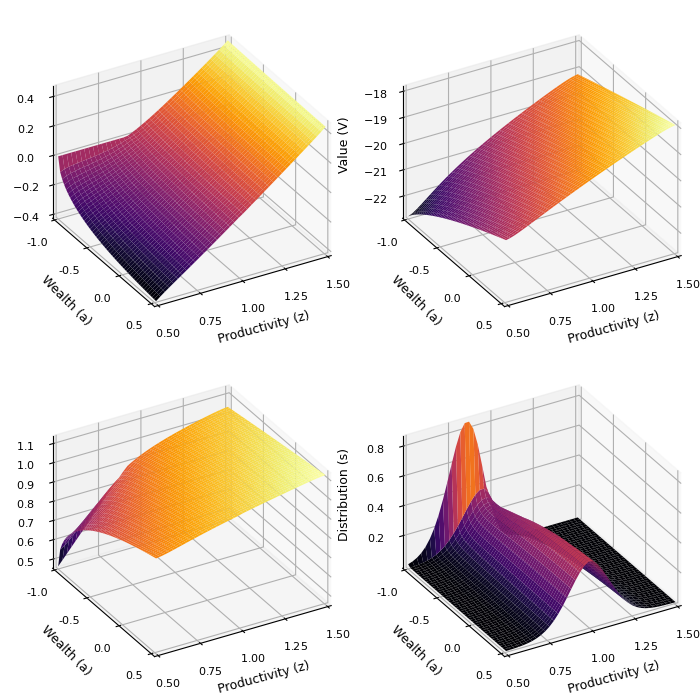

In [26]:
it = 50
ap = he.a[1:it,:]
zp = he.zz[1:it,:]
sp = ss[1:it,:]
Vp = V[1:it,:]
cp = c[1:it,:]
gp = g[1:it,:]


p1 = plot(zp, -ap, sp, st=:surface, camera=(-30,30), yticks = ([1.0, 0.5, 0,-0.5], [-1.0, -0.5, 0, 0.5]), xlabel = "Productivity (z)", ylabel = "Wealth (a)", zlabel = "Savings (s)", colorbar=false)
p1 = plot!(size=(700,400), xguidefontsize=9, yguidefontsize=9, zguidefontsize=9, xguidefontrotation=15, yguidefontrotation=-45, zguidefontrotation=90)

p2 = plot(zp, -ap, Vp, st=:surface, camera=(-30,30), yticks = ([1.0, 0.5, 0,-0.5], [-1.0, -0.5, 0, 0.5]), xlabel = "Productivity (z)", ylabel = "Wealth (a)", zlabel = "Value (V)", colorbar=false)
p2 = plot!(size=(700,400), xguidefontsize=9, yguidefontsize=9, zguidefontsize=9, xguidefontrotation=15, yguidefontrotation=-45, zguidefontrotation=90)

p3 = plot(zp, -ap, cp, st=:surface, camera=(-30,30), yticks = ([1.0, 0.5, 0,-0.5], [-1.0, -0.5, 0, 0.5]), xlabel = "Productivity (z)", ylabel = "Wealth (a)", zlabel = "Consumption (c)", colorbar=false)
p3 = plot!(size=(700,400), xguidefontsize=9, yguidefontsize=9, zguidefontsize=9, xguidefontrotation=15, yguidefontrotation=-45, zguidefontrotation=90)

p4 = plot(zp, -ap, gp, st=:surface, camera=(-30,30), yticks = ([1.0, 0.5, 0,-0.5], [-1.0, -0.5, 0, 0.5]), xlabel = "Productivity (z)", ylabel = "Wealth (a)", zlabel = "Distribution (g)", colorbar=false)
p4 = plot!(size=(700,400), xguidefontsize=9, yguidefontsize=9, zguidefontsize=9, xguidefontrotation=15, yguidefontrotation=-45, zguidefontrotation=90)

plot(p1, p2, p3, p4, size=(700,700))